In [6]:
# Read hot comments from hotCommentsFromUsers.csv

import pandas as pd

hot_comments_df = pd.read_csv('hotCommentsFromUsers.csv')

hot_comments_df.head(5)

C:\Users\26553\AppData\Local\Temp\ipykernel_28572\4135230324.py:5: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  hot_comments_df = pd.read_csv('hotCommentsFromUsers.csv')


,comment_id,link_id,subreddit,parent_id,redditor_id,created_at,body,score,edited,removed
0,l36kipr,1cmy9mm,ArtistLounge,t3_1cmy9mm,4pt94,2024-05-08 22:21:22+00,I think beginner artists should stop posting t...,"{""2024-05-12T00:00:57"":4}",False,NaN
1,l37k71y,1cnc2m2,mildlyinteresting,t1_l36trtq,4pt94,2024-05-09 01:59:19+00,Everyone has had that experience. It's weird b...,"{""2024-05-12T00:00:58"":0}",False,NaN
2,l37jvzb,1cnc2m2,mildlyinteresting,t1_l37gsw6,4pt94,2024-05-09 01:57:14+00,Look I'm speaking collectively about the prais...,"{""2024-05-12T00:00:59"":-2}",False,NaN
3,l37dtf5,1cnc2m2,mildlyinteresting,t1_l365mpu,4pt94,2024-05-09 01:16:40+00,Oh my God is that why you dweebs are applaudin...,"{""2024-05-12T00:01:00"":-7}",False,NaN
4,l33v9tz,1cme9ka,DigitalArt,t1_l32xj76,4pt94,2024-05-08 11:30:07+00,No that's illegal,"{""2024-05-12T00:01:01"":1}",False,NaN


In [7]:
# Count how many unique subreddits are in the dataset
unique_subreddits = list(hot_comments_df['subreddit'].unique())

print('Number of unique subreddits:', len(unique_subreddits))

Number of unique subreddits: 14301


In [8]:
# Group by redditor_id and count the number of comments each redditor has made
redditor_comment = hot_comments_df.groupby('redditor_id')

# For each redditor, get a list of the subreddits they have commented in in a list
redditor_subreddits = redditor_comment['subreddit'].unique()

# Convert it into a dictionary
redditor_subreddits_dict = redditor_subreddits.to_dict()

len(redditor_subreddits_dict)

10741

In [10]:
redditor_subreddits_indices_dict = {}
for redditor, subreddits in redditor_subreddits_dict.items():
    indices = [unique_subreddits.index(subreddit) for subreddit in subreddits]
    redditor_subreddits_indices_dict[redditor] = indices


# Indices to bow
import numpy as np

def indices_to_bow(indices, n):
    bow = np.zeros(n)
    for index in indices:
        bow[index] += 1
    return bow

redditor_bows = {}
for redditor, indices in redditor_subreddits_indices_dict.items():
    bow = indices_to_bow(indices, len(unique_subreddits))
    redditor_bows[redditor] = bow
        

In [46]:
# Perform clustering on the redditors based on the subreddits they have commented in
from sklearn.cluster import KMeans

redditor_subreddits_indices = list(redditor_bows.values())

# Dimensionality reduction
import umap

reducer = umap.UMAP(n_components=50)

redditor_subreddits_indices_PCA = reducer.fit_transform(redditor_subreddits_indices)

n_clusters = 20

kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(redditor_subreddits_indices_PCA)

redditor_clusters = kmeans.labels_

redditor_clusters_dict = dict(zip(redditor_subreddits_indices_dict.keys(), redditor_clusters))

# Get the redditors in each cluster
redditor_clusters_dict

c:\Users\26553\anaconda3\envs\DeepSolo\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


{'1003ub': 11,
 '100xvd': 19,
 '1018uiy6': 10,
 '101bnp': 10,
 '101e83': 0,
 '101nab': 10,
 '101p76': 10,
 '102ffp': 2,
 '102niy': 0,
 '102sv4': 6,
 '102vnysv': 10,
 '103p4x': 4,
 '1046h9': 2,
 '105fo13y': 5,
 '105zsc': 10,
 '1063oc': 10,
 '106pl8': 7,
 '106s0m': 19,
 '106sbn': 18,
 '106uyt': 0,
 '107gn9': 3,
 '107m9l': 10,
 '107yga': 8,
 '107yxk': 18,
 '108gdo': 10,
 '108nnv': 4,
 '108wd6': 14,
 '108xp0ai': 17,
 '108yp75d': 13,
 '1099hq': 10,
 '109j3n': 18,
 '109wap': 4,
 '10aox6': 0,
 '10bnwk': 4,
 '10cmdu': 18,
 '10e3xd': 14,
 '10eri7': 15,
 '10faz7': 10,
 '10fbvtfw': 19,
 '10fs1ohf': 18,
 '10fvfg': 10,
 '10g7dr': 10,
 '10gqz5': 10,
 '10h7g8iu': 18,
 '10h9pl': 4,
 '10ies3': 19,
 '10ifen': 19,
 '10jfcn': 10,
 '10jhqq': 19,
 '10k3ge': 5,
 '10kucx': 18,
 '10m4pl': 19,
 '10m8e6': 18,
 '10nzdc': 10,
 '10o1nw': 12,
 '10og364': 6,
 '10otvc': 0,
 '10oxrm': 4,
 '10pfc5': 13,
 '10punx': 6,
 '10qfc9': 16,
 '10qjs7p4': 14,
 '10r5zr': 7,
 '10rumh': 13,
 '10scsz': 14,
 '10sdic': 4,
 '10seol': 5,


In [47]:
# Show top n subreddits in each cluster
top_n = 5

cluster_subreddits = {}
for cluster in range(n_clusters):
    redditors_in_cluster = [redditor for redditor, cluster_num in redditor_clusters_dict.items() if cluster_num == cluster]
    cluster_subreddits[cluster] = [unique_subreddits[index] for index in np.argsort(np.sum([redditor_bows[redditor] for redditor in redditors_in_cluster], axis=0))[-top_n:]]

cluster_subreddits

{0: ['AITAH', 'antiwork', 'interestingasfuck', 'unpopularopinion', 'facepalm'],
 1: ['DefendingAIArt',
  'StableDiffusion',
  'ArtistLounge',
  'ArtistHate',
  'aiwars'],
 2: ['DnD', 'worldjerking', 'Showerthoughts', 'memes', 'worldbuilding'],
 3: ['ArtificialInteligence',
  'Futurology',
  'ChatGPT',
  'OpenAI',
  'singularity'],
 4: ['pcmasterrace', 'Games', 'pcgaming', 'Helldivers', 'gaming'],
 5: ['pics',
  'unpopularopinion',
  'NoStupidQuestions',
  'AskReddit',
  'changemyview'],
 6: ['gamedev', 'Unity3D', 'blender', '3Dmodeling', 'ArtistHate'],
 7: ['midjourney', 'aiArt', 'LocalLLaMA', 'singularity', 'StableDiffusion'],
 8: ['facepalm', 'ArtistLounge', 'singularity', 'AskReddit', 'aiwars'],
 9: ['DigitalArt',
  'HungryArtists',
  'AskReddit',
  'artbusiness',
  'ArtistLounge'],
 10: ['mildlyinteresting',
  'unitedkingdom',
  'DigitalPainting',
  'DnD',
  'askphilosophy'],
 11: ['worldnews', 'neoliberal', 'AskReddit', 'LivestreamFail', 'Destiny'],
 12: ['facepalm',
  'singularit

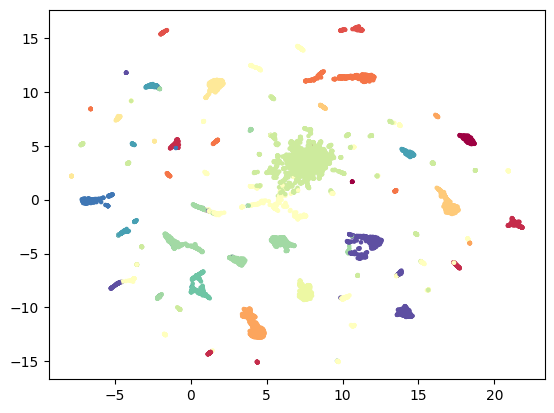

In [45]:
import umap

reducer = umap.UMAP()

redditor_bows_array = np.array(redditor_subreddits_indices_PCA)

embedding = reducer.fit_transform(redditor_bows_array)

import matplotlib.pyplot as plt

plt.scatter(embedding[:, 0], embedding[:, 1], c=redditor_clusters, cmap='Spectral', s=5)

plt.show()


In [50]:
topics_to_clusters = {
    "AI Art and Creative Communities": [1, 7, 8, 9],
    "AI and Technology Development": [2, 3, 6, 12, 13, 18],
    "Gaming and AI in Gaming": [4, 17, 15],
    "News and Daily life": [0, 5, 10, 11, 14, 16, 19],
}

In [69]:
# Assign users to topics
redditor_topics_dict = {}
for redditor, cluster in redditor_clusters_dict.items():
    for topic, clusters in topics_to_clusters.items():
        if cluster in clusters:
            redditor_topics_dict[redditor] = topic
            break

# Save into a csv file
redditor_topics_df = pd.DataFrame(redditor_topics_dict.items(), columns=['redditor_id', 'community'])

redditor_topics_df.to_csv('redditorTopics.csv', index=False)

In [70]:
df_opinions = pd.read_pickle('../pipeline3-opinion distillation/df_distilled_opinions_v2.pkl')

In [71]:
df_opinions_merged = df_opinions.merge(redditor_topics_df, on='redditor_id', how='left')

In [73]:
df_opinions_merged.head(5)
len(df_opinions_merged)

df_opinions_merged.to_pickle('df_distilled_opinions_v3.pkl')